In [1]:
import pandas as pd
from pdtcode import *
import matplotlib.pyplot as plt
import numpy as np
import math

In [ ]:
path = "<XAUUSD or EURUSD>"
result_path = r"<Path to Results>"

In [ ]:
big = pd.read_csv(r"stooq\\5 min\world\\currencies\\major\\eurusd.txt")
big.rename(columns={
    '<OPEN>': 'Open',
    '<HIGH>': 'High',
    '<LOW>': 'Low',
    '<CLOSE>': 'Close',
    '<TIME>': 'time'
}, inplace=True)
big.drop(['<TICKER>', '<PER>', '<OPENINT>', '<VOL>', '<DATE>'], axis=1, inplace=True)

In [4]:
def pltandsave(results_df, combined_portfolio_df, x):
        bot_percent_change = (
            (combined_portfolio_df[f'Portfolio_{path}'] - 10000)/10000
        )
        close_values = results_df['Close'].values
        nifty_percent_change = (
            (close_values - close_values[0]) / close_values[0]
        )
        outperformance_mask   = bot_percent_change > nifty_percent_change
        underperformance_mask = ~outperformance_mask
        plt.figure(figsize=(14, 7))

        days = np.arange(1, len(results_df) + 1)

        plt.plot(days, bot_percent_change, 
                label="Bot's Performance",
                color="blue",
                linestyle="-",
                linewidth=2)

        plt.plot(days, nifty_percent_change, 
                label=f"{path}",
                color="orange",
                linestyle="--",
                linewidth=2)

        plt.fill_between(days,
                        nifty_percent_change, 
                        bot_percent_change,
                        where=outperformance_mask,
                        color="green",
                        alpha=0.3,
                        interpolate=True,
                        label="Outperformance Zone")

        plt.fill_between(days,
                        nifty_percent_change, 
                        bot_percent_change,
                        where=underperformance_mask,
                        color="red",
                        alpha=0.3,
                        interpolate=True,
                        label="Underperformance Zone")

        max_return      = bot_percent_change.max()
        max_return_day  = bot_percent_change.idxmax() - bot_percent_change.index[0]
        highest_x_value = days[max_return_day]
        plt.plot(highest_x_value, max_return, 
                marker='o', 
                markersize=10, 
                markerfacecolor='none',
                markeredgecolor='black', 
                markeredgewidth=2)

        plt.annotate(
        f"Highest Return: ${max_return:.2f} per dollar invested",
        xy=(highest_x_value, max_return),
        xytext=(10, 10), textcoords='offset points',
        fontsize=11,
        arrowprops=dict(arrowstyle='->', color='black'),
        bbox=dict(boxstyle="round", fc="white", ec="black", alpha=0.7)
        )


        plt.xlabel("Interval", fontsize=17)
        plt.ylabel("Earning Per Dollar", fontsize=17)
        plt.legend(fontsize=13, loc='upper left')
        plt.grid(True)

        perf_image_path = f"{result_path}/P{x}_{path}.png"
        plt.savefig(perf_image_path, dpi=300, bbox_inches='tight')
        plt.show()
        print(f"Performance plot successfully saved as '{perf_image_path}'")

        bot_values   = pd.Series((combined_portfolio_df[f'Portfolio_{path}'].values - combined_portfolio_df[f'Portfolio_{path}'].values[0])/combined_portfolio_df[f'Portfolio_{path}'].values[0])
        nifty_values = pd.Series((close_values - close_values[0]) / close_values[0])

        bot_cummax   = bot_values.cummax()
        nifty_cummax = nifty_values.cummax()

        bot_drawdown   = (bot_values - bot_cummax)
        nifty_drawdown = (nifty_values - nifty_cummax)

        bot_drawdown   = bot_drawdown.iloc[-combined_portfolio_df['Average_Portfolio'].size:]
        nifty_drawdown = nifty_drawdown.iloc[-combined_portfolio_df['Average_Portfolio'].size:]

        drawdown_outperform_mask   = bot_drawdown > nifty_drawdown
        drawdown_underperform_mask = ~drawdown_outperform_mask

        plt.figure(figsize=(14, 7))

        plt.plot(days, bot_drawdown, 
                label="Bot's Drawdown", 
                color="blue",  
                linestyle="-", 
                linewidth=2)

        plt.plot(days, nifty_drawdown, 
                label=f"{path}'s Drawdown", 
                color="orange",  
                linestyle="--", 
                linewidth=2)

        plt.fill_between(days, 
                        nifty_drawdown, 
                        bot_drawdown,
                        where=drawdown_outperform_mask,
                        color="green",
                        alpha=0.3,
                        interpolate=True,
                        label="Outperformance Zone")
        plt.fill_between(days, 
                        nifty_drawdown, 
                        bot_drawdown,
                        where=drawdown_underperform_mask,
                        color="red",
                        alpha=0.3,
                        interpolate=True,
                        label="Underperformance Zone")

        bot_max_drawdown = bot_drawdown.min()
        bot_max_dd_day   = bot_drawdown.idxmin()
        bot_dd_x_value   = np.where(bot_drawdown.index == bot_max_dd_day)[0][0] + 1  

        plt.plot(bot_dd_x_value, bot_max_drawdown,
                marker='o',
                markersize=10,
                markerfacecolor='none',
                markeredgecolor='black',
                markeredgewidth=2)

        plt.annotate(
        f"Max Drawdown: ${bot_max_drawdown:.2f} per dollar invested",
        xy=(bot_dd_x_value, bot_max_drawdown),
        xytext=(10, 10), textcoords='offset points',
        fontsize=11,
        arrowprops=dict(arrowstyle='->', color='black'),
        bbox=dict(boxstyle="round", fc="white", ec="black", alpha=0.7)
        )

        plt.xlabel("Interval", fontsize=17)
        plt.ylabel("Drawdown Per Dollar", fontsize=17)
        plt.legend(fontsize=13, loc='lower left')
        plt.grid(True)

        drawdown_image_path = f"{result_path}/D{x}_{path}.png"
        plt.savefig(drawdown_image_path, dpi=300, bbox_inches='tight')
        plt.show()
        print(f"Drawdown plot successfully saved as '{drawdown_image_path}'")


In [5]:
t_profit = 0
t_bns = 0
results_summary = []
total_summary = {'Algo Profit':0, 'Buy and Hold Profit':0, 'Total Trades':0, 'Successful Trades':0}

/home/vishrut/Documents/otherstockstuff/stocks-pdt/pdtcode.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Swing_High'] = df['High'].where(swing_high_condition).ffill()
/home/vishrut/Documents/otherstockstuff/stocks-pdt/pdtcode.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Swing_Low'] = df['Low'].where(swing_low_condition).ffill()
/home/vishrut/Documents/otherstockstuff/stocks-pdt/pdtcode.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

thegraph.csv has been saved.


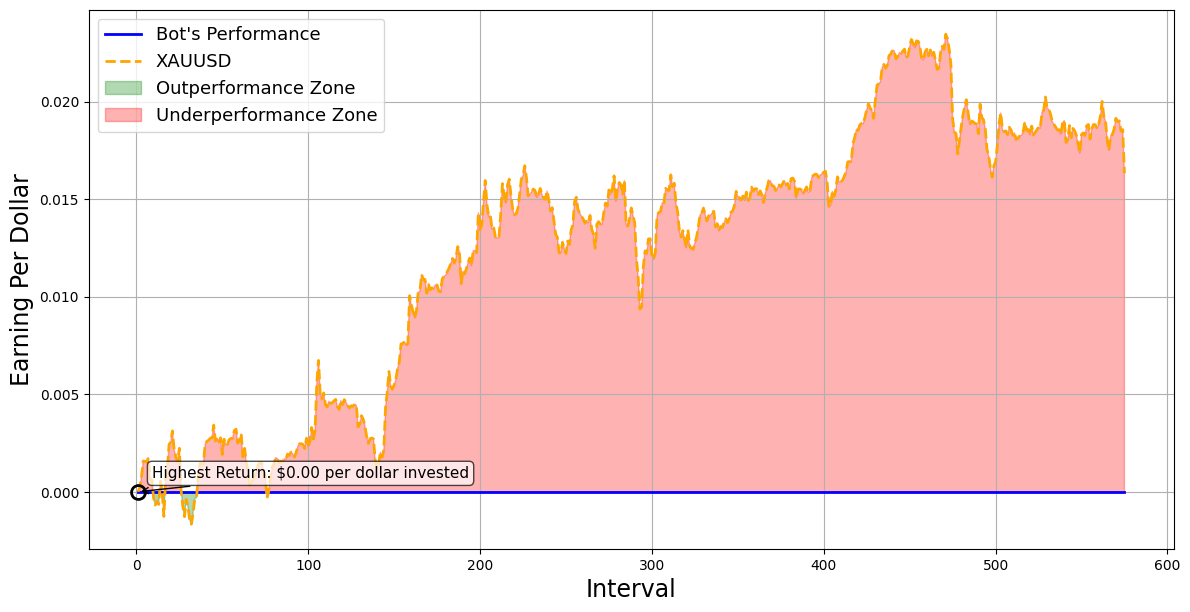

Performance plot successfully saved as '/home/vishrut/Documents/otherstockstuff/stocks-pdt/results/P1_XAUUSD.png'


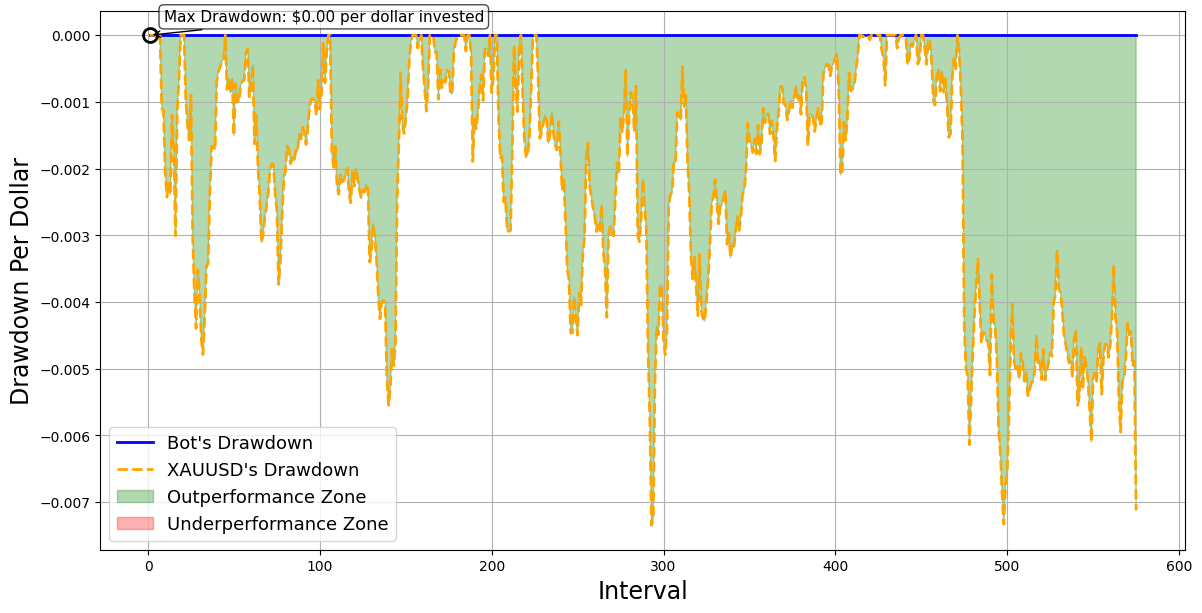

Drawdown plot successfully saved as '/home/vishrut/Documents/otherstockstuff/stocks-pdt/results/D1_XAUUSD.png'


/home/vishrut/Documents/otherstockstuff/stocks-pdt/pdtcode.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Swing_High'] = df['High'].where(swing_high_condition).ffill()
/home/vishrut/Documents/otherstockstuff/stocks-pdt/pdtcode.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Swing_Low'] = df['Low'].where(swing_low_condition).ffill()
/home/vishrut/Documents/otherstockstuff/stocks-pdt/pdtcode.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

thegraph.csv has been saved.


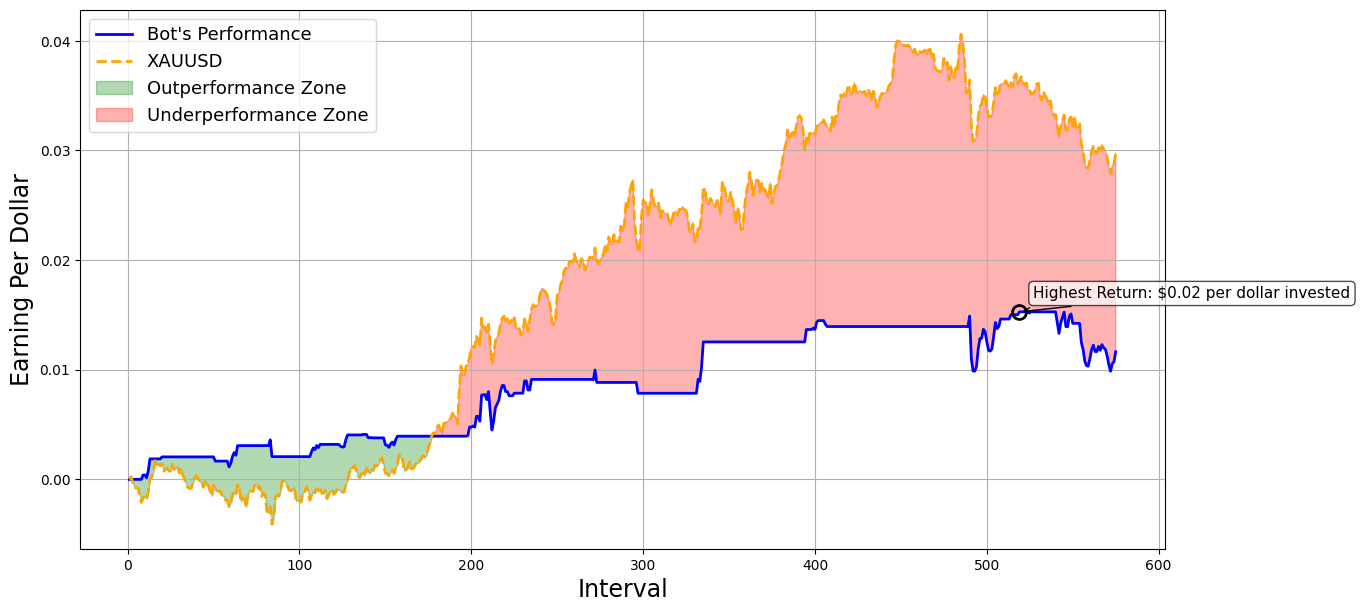

Performance plot successfully saved as '/home/vishrut/Documents/otherstockstuff/stocks-pdt/results/P2_XAUUSD.png'


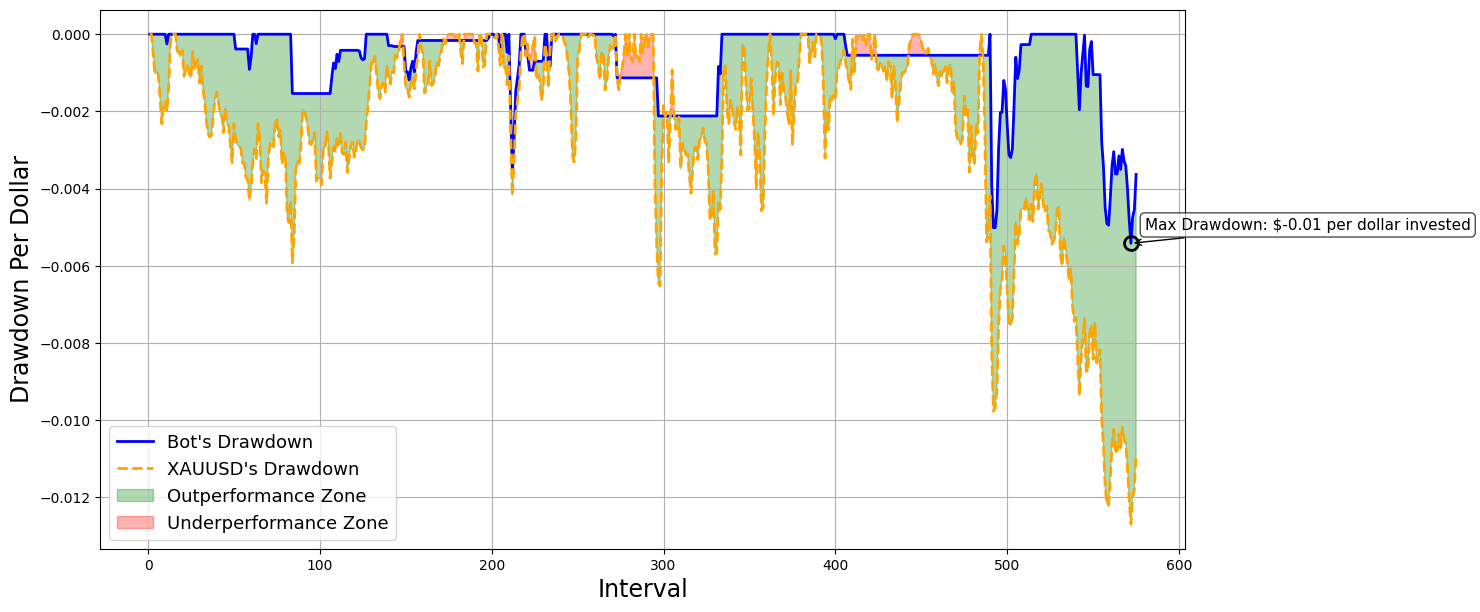

Drawdown plot successfully saved as '/home/vishrut/Documents/otherstockstuff/stocks-pdt/results/D2_XAUUSD.png'


/home/vishrut/Documents/otherstockstuff/stocks-pdt/pdtcode.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Swing_High'] = df['High'].where(swing_high_condition).ffill()
/home/vishrut/Documents/otherstockstuff/stocks-pdt/pdtcode.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Swing_Low'] = df['Low'].where(swing_low_condition).ffill()
/home/vishrut/Documents/otherstockstuff/stocks-pdt/pdtcode.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

thegraph.csv has been saved.


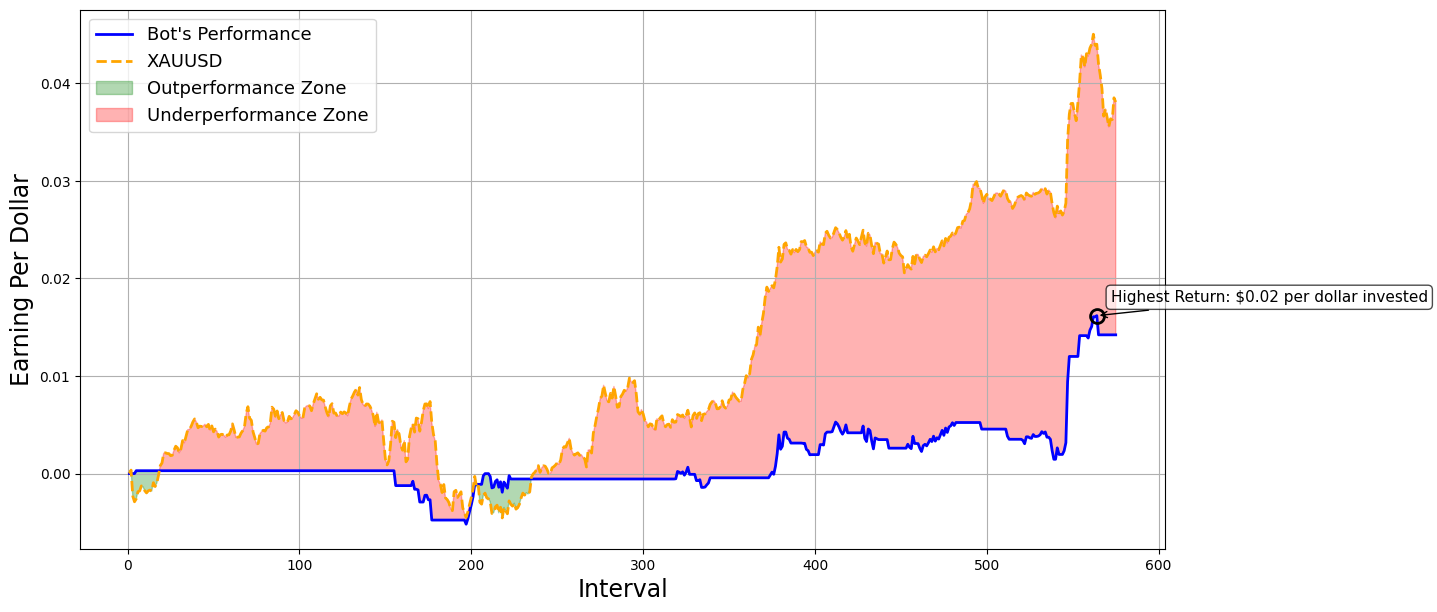

Performance plot successfully saved as '/home/vishrut/Documents/otherstockstuff/stocks-pdt/results/P3_XAUUSD.png'


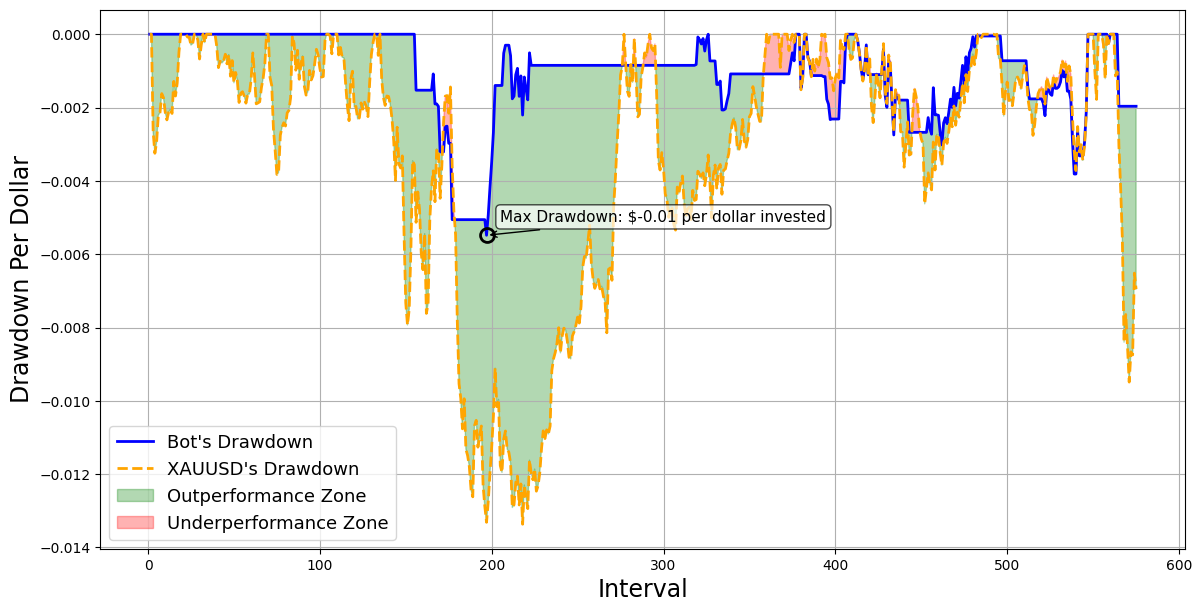

Drawdown plot successfully saved as '/home/vishrut/Documents/otherstockstuff/stocks-pdt/results/D3_XAUUSD.png'


/home/vishrut/Documents/otherstockstuff/stocks-pdt/pdtcode.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Swing_High'] = df['High'].where(swing_high_condition).ffill()
/home/vishrut/Documents/otherstockstuff/stocks-pdt/pdtcode.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Swing_Low'] = df['Low'].where(swing_low_condition).ffill()
/home/vishrut/Documents/otherstockstuff/stocks-pdt/pdtcode.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

thegraph.csv has been saved.


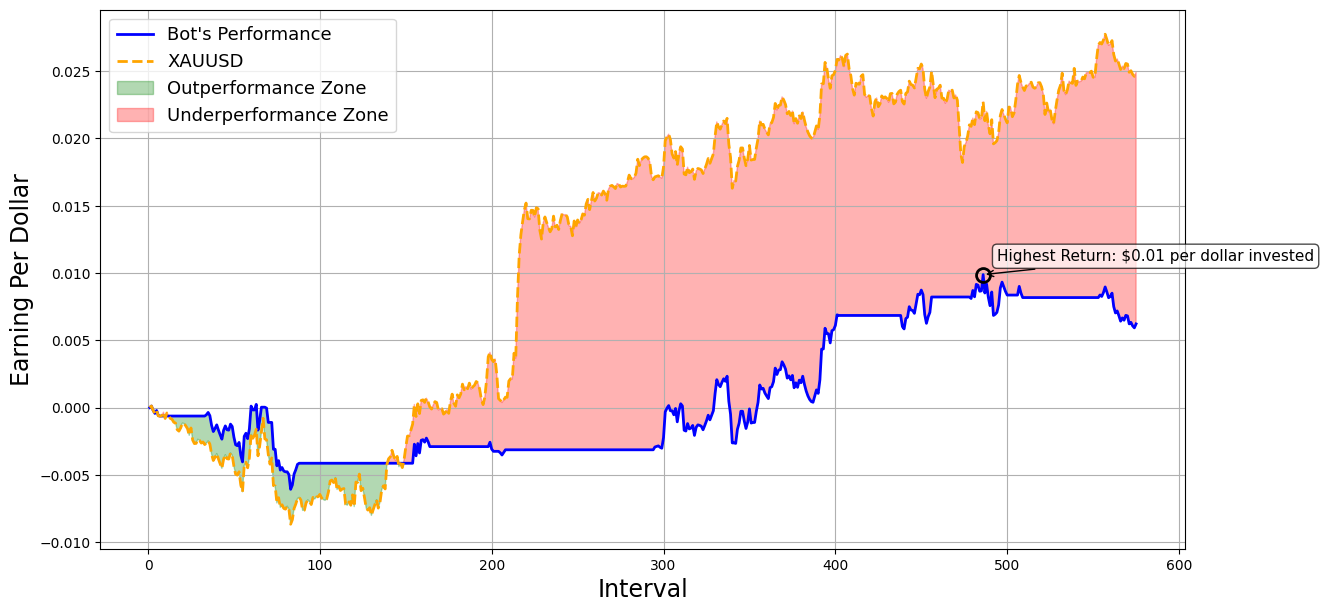

Performance plot successfully saved as '/home/vishrut/Documents/otherstockstuff/stocks-pdt/results/P4_XAUUSD.png'


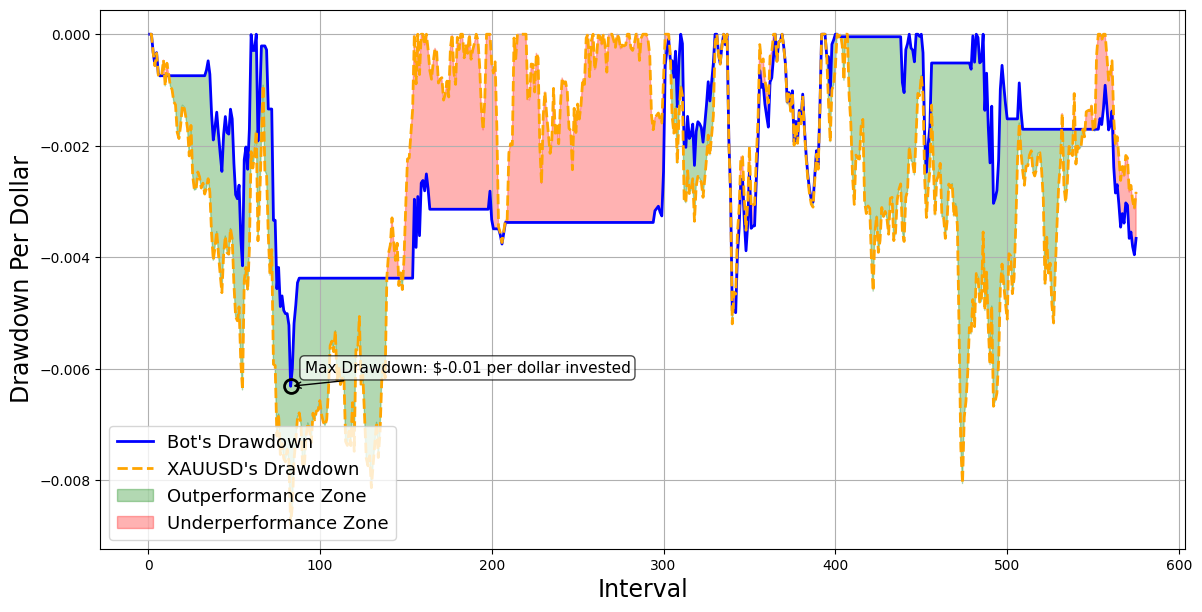

Drawdown plot successfully saved as '/home/vishrut/Documents/otherstockstuff/stocks-pdt/results/D4_XAUUSD.png'


/home/vishrut/Documents/otherstockstuff/stocks-pdt/pdtcode.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Swing_High'] = df['High'].where(swing_high_condition).ffill()
/home/vishrut/Documents/otherstockstuff/stocks-pdt/pdtcode.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Swing_Low'] = df['Low'].where(swing_low_condition).ffill()
/home/vishrut/Documents/otherstockstuff/stocks-pdt/pdtcode.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

thegraph.csv has been saved.


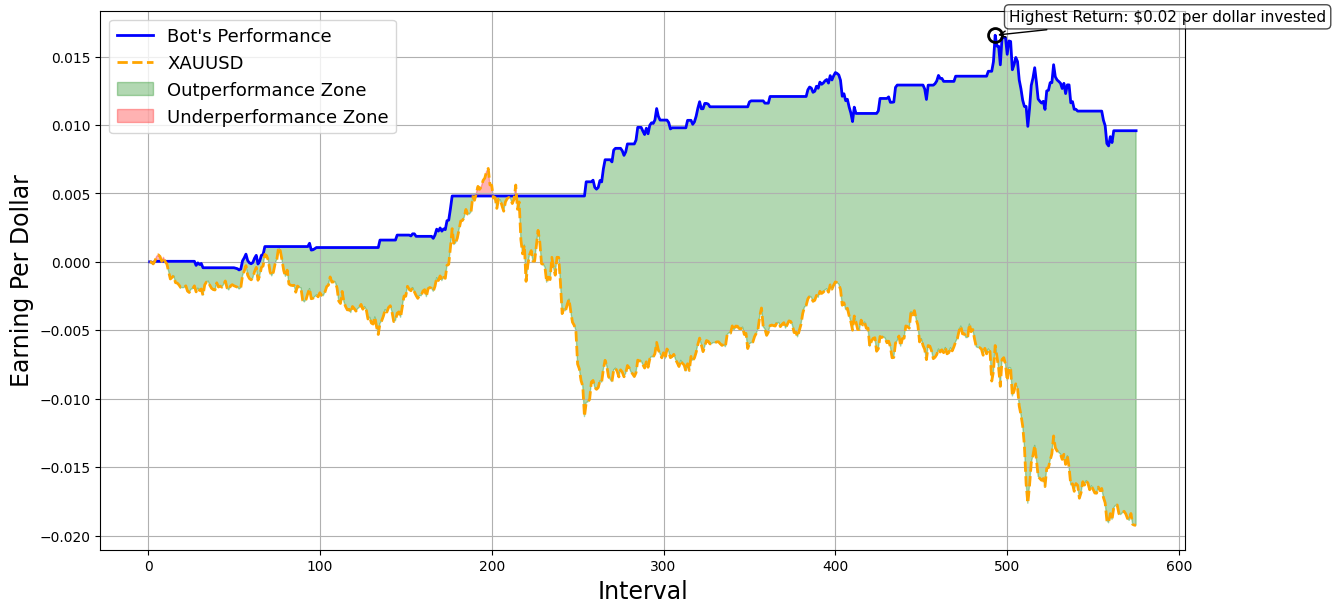

Performance plot successfully saved as '/home/vishrut/Documents/otherstockstuff/stocks-pdt/results/P5_XAUUSD.png'


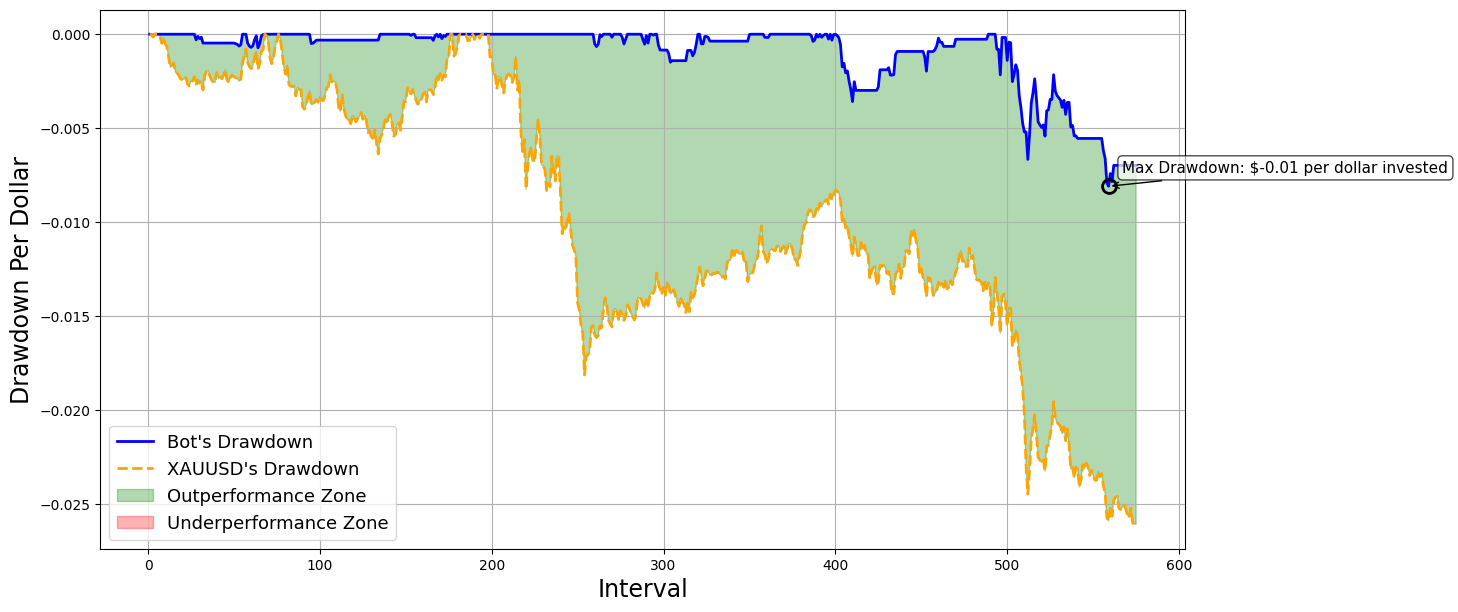

Drawdown plot successfully saved as '/home/vishrut/Documents/otherstockstuff/stocks-pdt/results/D5_XAUUSD.png'


/home/vishrut/Documents/otherstockstuff/stocks-pdt/pdtcode.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Swing_High'] = df['High'].where(swing_high_condition).ffill()
/home/vishrut/Documents/otherstockstuff/stocks-pdt/pdtcode.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Swing_Low'] = df['Low'].where(swing_low_condition).ffill()
/home/vishrut/Documents/otherstockstuff/stocks-pdt/pdtcode.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

thegraph.csv has been saved.


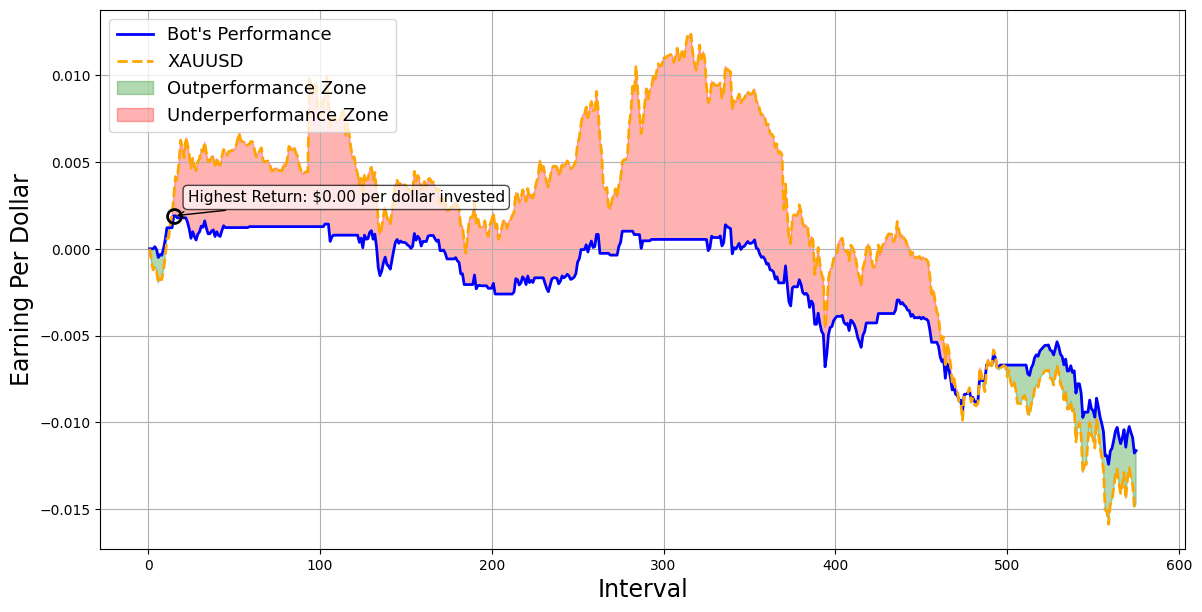

Performance plot successfully saved as '/home/vishrut/Documents/otherstockstuff/stocks-pdt/results/P6_XAUUSD.png'


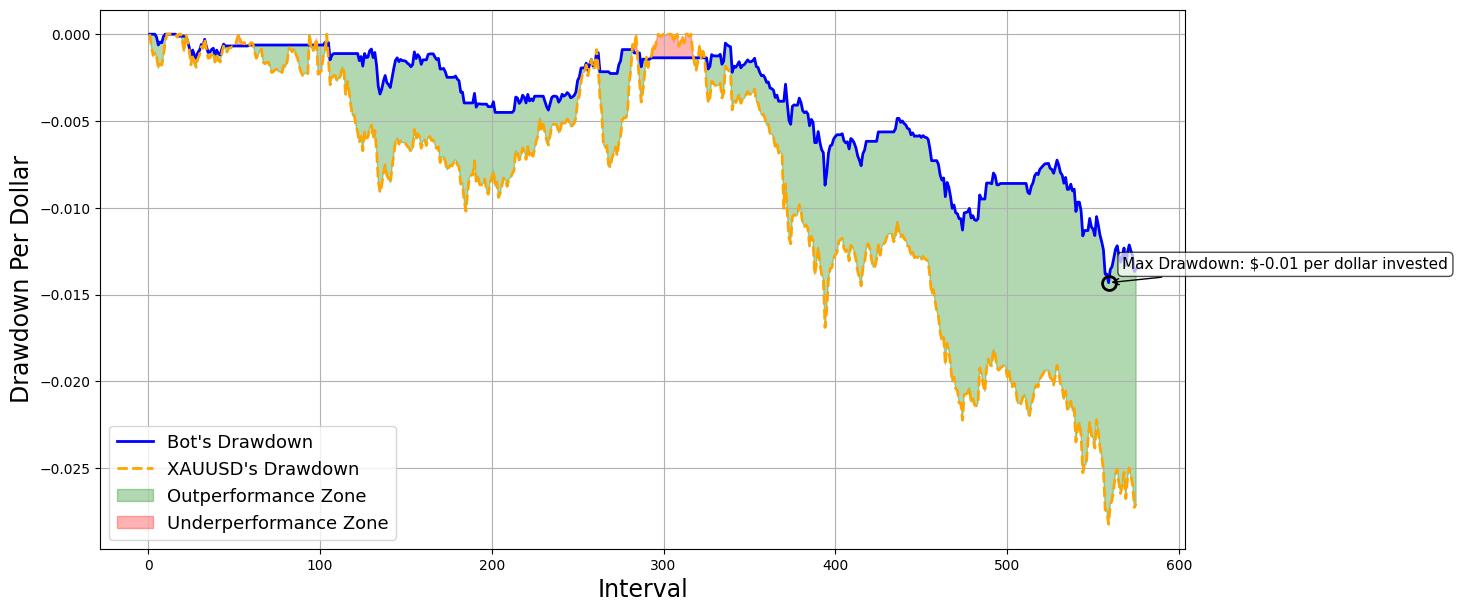

Drawdown plot successfully saved as '/home/vishrut/Documents/otherstockstuff/stocks-pdt/results/D6_XAUUSD.png'


/home/vishrut/Documents/otherstockstuff/stocks-pdt/pdtcode.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Swing_High'] = df['High'].where(swing_high_condition).ffill()
/home/vishrut/Documents/otherstockstuff/stocks-pdt/pdtcode.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Swing_Low'] = df['Low'].where(swing_low_condition).ffill()
/home/vishrut/Documents/otherstockstuff/stocks-pdt/pdtcode.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

thegraph.csv has been saved.


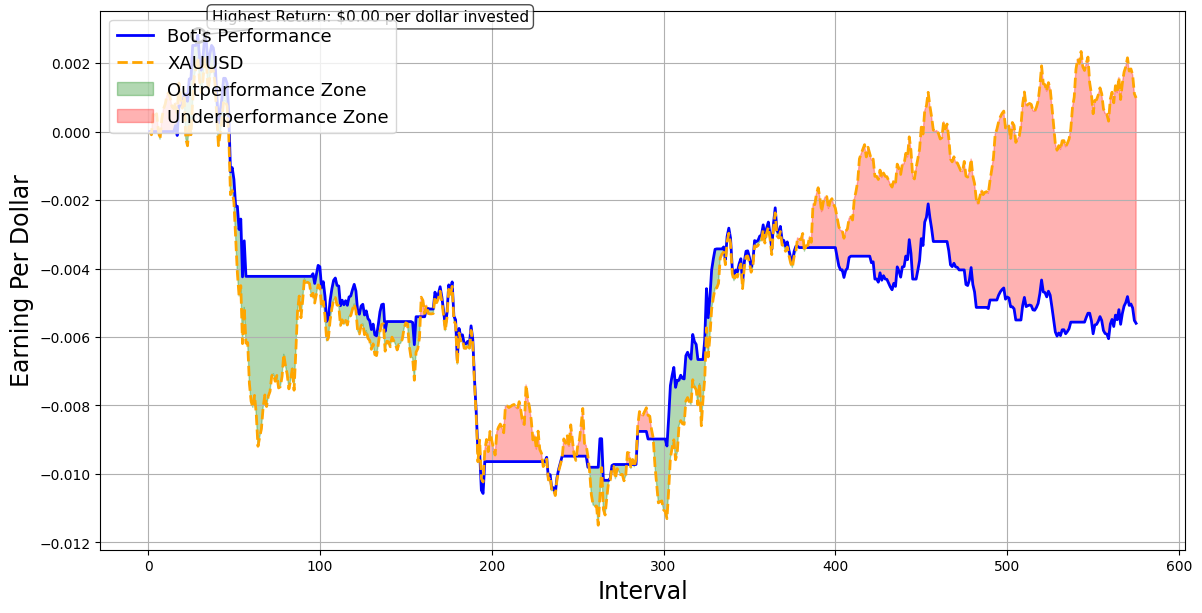

Performance plot successfully saved as '/home/vishrut/Documents/otherstockstuff/stocks-pdt/results/P7_XAUUSD.png'


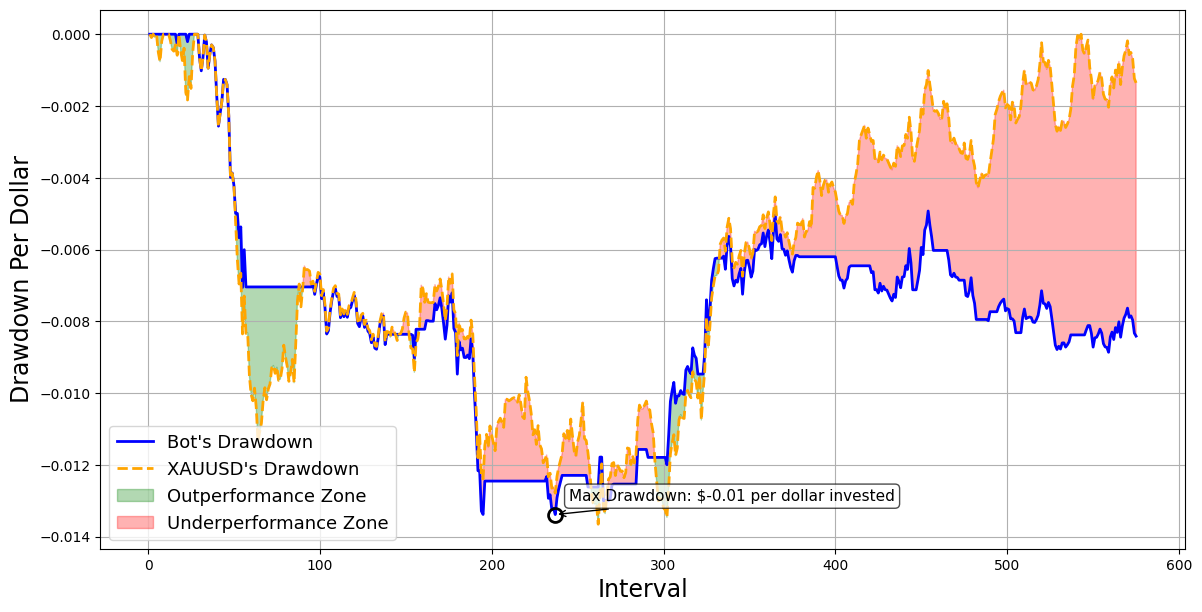

Drawdown plot successfully saved as '/home/vishrut/Documents/otherstockstuff/stocks-pdt/results/D7_XAUUSD.png'


/home/vishrut/Documents/otherstockstuff/stocks-pdt/pdtcode.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Swing_High'] = df['High'].where(swing_high_condition).ffill()
/home/vishrut/Documents/otherstockstuff/stocks-pdt/pdtcode.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Swing_Low'] = df['Low'].where(swing_low_condition).ffill()
/home/vishrut/Documents/otherstockstuff/stocks-pdt/pdtcode.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

thegraph.csv has been saved.


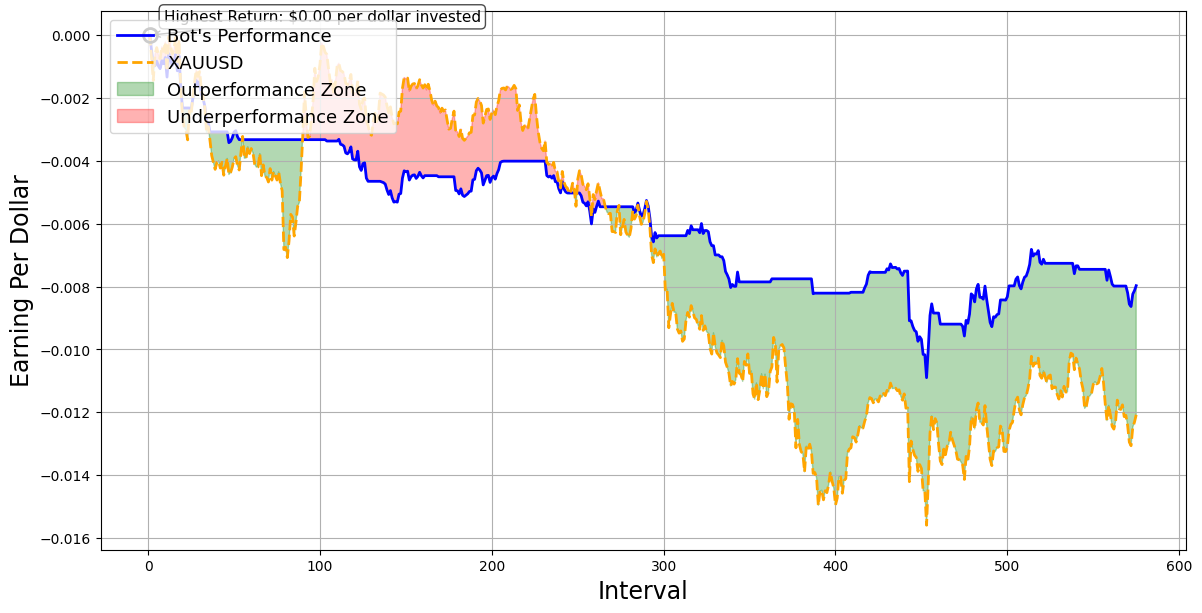

Performance plot successfully saved as '/home/vishrut/Documents/otherstockstuff/stocks-pdt/results/P8_XAUUSD.png'


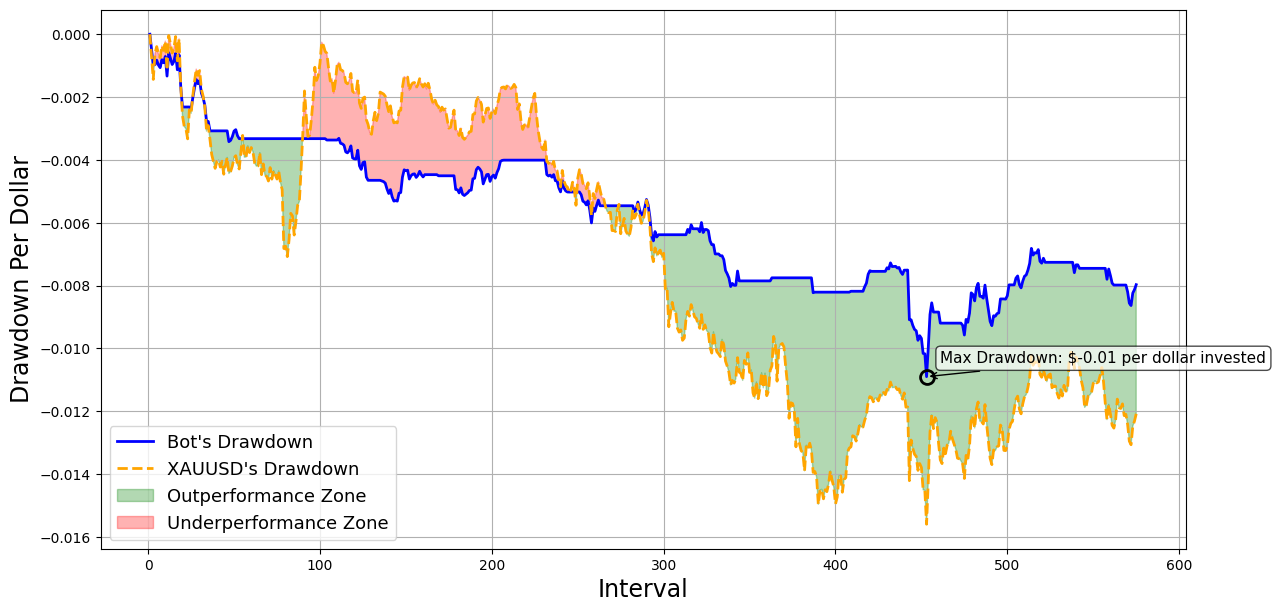

Drawdown plot successfully saved as '/home/vishrut/Documents/otherstockstuff/stocks-pdt/results/D8_XAUUSD.png'


In [6]:
for x in range(1, math.ceil(len(big)/3225)):
    startidx = (x-1) * 3225
    endidx = startidx + 3225
    data = big.iloc[startidx:endidx]
    data = prepare_df(data)
    features = data[['Dist_To_Swing_High', 'Dist_To_Swing_Low', 'Order_Block', 'MA_20', 'MA_50', 'RSI', 'diff']]
    X = features.values
    y = data['Target'].values
    split_ratio = 0.8
    split_index = int(len(X) * split_ratio)
    X_train, X_test, y_train, y_test, y_pred, tree = create_train_test(split_index, X, y)
    test_indices = np.arange(split_index+50, len(data))
    closing_prices = data['Close'].iloc[split_index+50:].values
    results_df = pd.DataFrame({
        'Datetime': test_indices,
        'Actual': y_test,
        'Predicted': y_pred,
        'Close': closing_prices
    }).reset_index(drop=True)
    portfolio_df_list = []
    portfolio_values, appenders = simulate(path, results_df, results_summary, trailing_stop_percent=0.005, x=x)
    df_portfolio = pd.DataFrame({
        'Datetime': results_df['Datetime'],
        f'Portfolio_{path}': portfolio_values
    })
    df_portfolio.set_index('Datetime', inplace=True)
    portfolio_df_list.append(df_portfolio)
    combined_portfolio_df = pd.concat(portfolio_df_list, axis=1).fillna(method='ffill').fillna(method='bfill')
    combined_portfolio_df['Total_Portfolio'] = combined_portfolio_df.mean(axis=1)
    thegraph = combined_portfolio_df['Total_Portfolio']
    thegraph.to_csv("thegraph.csv")
    print("thegraph.csv has been saved.")
    combined_portfolio_df = pd.concat(portfolio_df_list, axis=1)
    portfolio_cols = [col for col in combined_portfolio_df.columns if col.startswith('Portfolio_')]
    combined_portfolio_df['Average_Portfolio'] = combined_portfolio_df[portfolio_cols].mean(axis=1)
    pltandsave(results_df, combined_portfolio_df, x)
    total_summary['Algo Profit'] += float(appenders['Algo Profit'])
    total_summary['Buy and Hold Profit'] += float(appenders['Buy and Hold Profit'])
    total_summary['Total Trades'] += int(appenders['Total Trades'])
    total_summary['Successful Trades'] += int(appenders['Successful Trades'])

In [7]:
total_summary

{'Algo Profit': 0.016456000000000134,
 'Buy and Hold Profit': 0.06402237298875028,
 'Total Trades': 240,
 'Successful Trades': 122}

In [8]:
pd.DataFrame(results_summary).to_csv(f"{result_path}/{path}.csv", index=False)